### First of all, this is my second implementation. I had implemented ARIMA already in one of my previous notebooks and it had failed to predict. I have done FB Prophet in this and it is showing really great results. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

import seaborn as sns
worldometers=pd.read_csv('../input/corona-virus-report/worldometer_data.csv')
worldometersnew=worldometers[['Country/Region','TotalCases','TotalDeaths','TotalRecovered','Serious,Critical']].copy()
worldometersnew.head()
worldometersnew.iloc[0:10].style.background_gradient(cmap='Reds')


,Country/Region,TotalCases,TotalDeaths,TotalRecovered,"Serious,Critical"
0,USA,4433410,150444.000000,2136603.000000,19100.000000
1,Brazil,2446397,87737.000000,1667667.000000,8318.000000
2,India,1484136,33461.000000,954004.000000,8944.000000
3,Russia,818120,13354.000000,603329.000000,2300.000000
4,South Africa,452529,7067.000000,274925.000000,539.000000
5,Mexico,395489,44022.000000,256777.000000,3922.000000
6,Peru,389717,18418.000000,272547.000000,1439.000000
7,Chile,347923,9187.000000,319954.000000,1555.000000
8,Spain,325862,28434.000000,nan,617.000000
9,UK,300111,45759.000000,nan,104.000000


#### Couldn't help with nan because worldometers haven't disclosed them.

# EDA & Time Series Model Using Facebook Prophet

#### Created a new dataframe from the old dataframe only containing Date & cases

In [2]:


sns.set_style("whitegrid")
timeseries=pd.read_csv('../input/corona-virus-report/day_wise.csv')
timeseriesnew=timeseries[['Date','New cases']].copy()
timeseriesnew['Date']=pd.to_datetime(timeseriesnew['Date']) 

timeseriesnew.head()


,Date,New cases
0,2020-01-22,0
1,2020-01-23,99
2,2020-01-24,287
3,2020-01-25,493
4,2020-01-26,684


#### Indexed the date for plotting

In [3]:
timeseriesnew['month'] = timeseriesnew['Date'].apply(lambda x: x.month)
timeseriesnew.set_index('Date', inplace= True)
timeseriesnew=timeseriesnew.fillna(method='ffill')

timeseriesnew.sample(10)

,New cases,month
Date,,
2020-03-07,4038,3
2020-03-06,3943,3
2020-06-09,124342,6
2020-06-08,102225,6
2020-03-10,5024,3
2020-03-21,32306,3
2020-05-11,76298,5
2020-04-11,76965,4
2020-01-28,2651,1


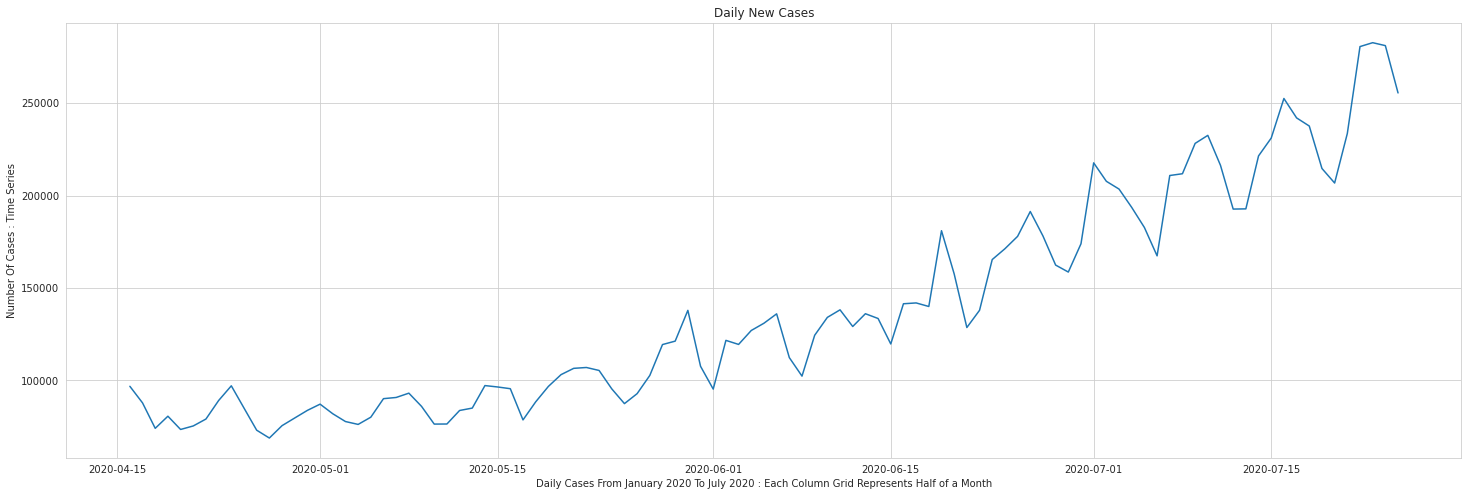

In [4]:
timeseriesyear=timeseriesnew.copy()
tsf=timeseriesnew.loc['2020-04-16':'2020-07-25'].copy()
tsf.drop('month', axis=1,inplace=True)
plt.figure(figsize=(25,8))
plt.plot(tsf)
plt.title('Daily New Cases')
plt.xlabel('Daily Cases From January 2020 To July 2020 : Each Column Grid Represents Half of a Month')
plt.ylabel('Number Of Cases : Time Series')
plt.show()

**Created a duplicate column date**

# Train & Test set splitting

In [5]:
tsf['Date'] = tsf.index
df_train = tsf[tsf['Date'] < "2020-07-08"]
df_valid = tsf[tsf['Date'] >= "2020-07-08"]
tsf.head()

,New cases,Date
Date,,
2020-04-16,96712,2020-04-16
2020-04-17,87724,2020-04-17
2020-04-18,73958,2020-04-18
2020-04-19,80523,2020-04-19
2020-04-20,73339,2020-04-20


# Fitting & Prediction

In [6]:
model_fbp=Prophet()
modelres=model_fbp.fit(df_train[["Date", "New cases"]].rename(columns={"Date": "ds", "New cases": "y"}))
forecast = model_fbp.predict(df_valid[["Date", "New cases"]].rename(columns={"Date": "ds"}))
df_valid["Forecast Prediction"] = forecast.yhat.values

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


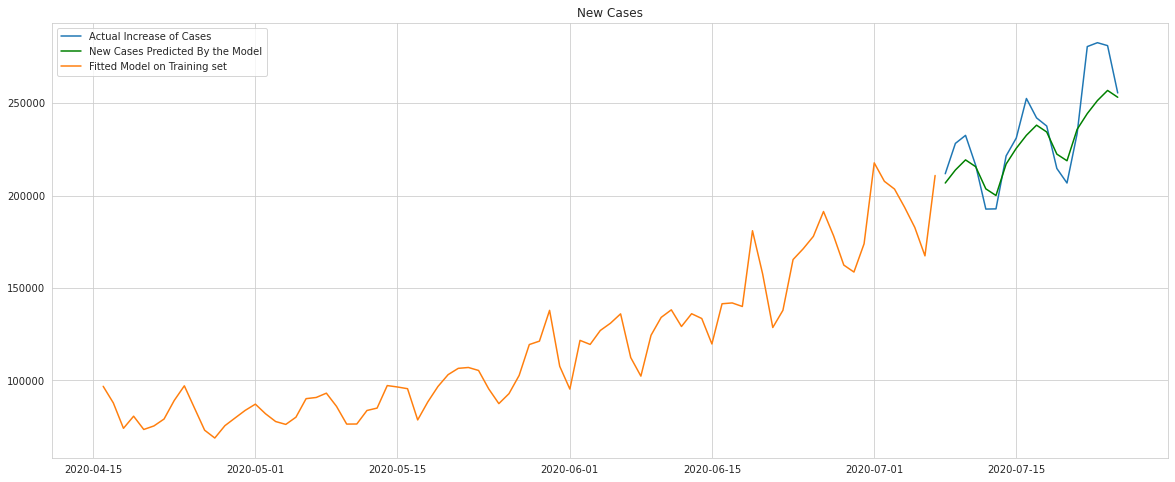

In [7]:
plt.figure(figsize=(20,8))


plt.plot(df_valid[["New cases"]])
plt.plot(df_valid["Forecast Prediction"],color='Green')
plt.plot(df_train[["New cases"]])
plt.title("New Cases")
plt.legend(['Actual Increase of Cases', 'New Cases Predicted By the Model','Fitted Model on Training set'], loc='upper left')


# August Month New Cases Prediction

**Creating new dataset for the month of august with null values inorder for the model to predict**

In [8]:
from pandas.tseries.offsets import DateOffset
future_dates=[tsf.index[-1]+ DateOffset(days=x)for x in range(0,30)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=tsf.columns)
future_datest_df['Date'] = future_datest_df.index
future_datest_df.head(10)

,New cases,Date
2020-07-26,NaN,2020-07-26
2020-07-27,NaN,2020-07-27
2020-07-28,NaN,2020-07-28
2020-07-29,NaN,2020-07-29
2020-07-30,NaN,2020-07-30
2020-07-31,NaN,2020-07-31
2020-08-01,NaN,2020-08-01
2020-08-02,NaN,2020-08-02
2020-08-03,NaN,2020-08-03
2020-08-04,NaN,2020-08-04


In [9]:
future_df=pd.concat([tsf,future_datest_df])

df_trains = future_df[future_df['Date'] < "2020-07-20"]
df_valids = future_df[future_df['Date'] >= "2020-07-06"]
future_df.tail()

,New cases,Date
2020-08-19,NaN,2020-08-19
2020-08-20,NaN,2020-08-20
2020-08-21,NaN,2020-08-21
2020-08-22,NaN,2020-08-22
2020-08-23,NaN,2020-08-23


In [10]:
model_fbp=Prophet()
modelres=model_fbp.fit(df_trains[["Date", "New cases"]].rename(columns={"Date": "ds", "New cases": "y"}))
forecast = model_fbp.predict(df_valids[["Date", "New cases"]].rename(columns={"Date": "ds"}))
df_valids["Forecast Prediction"] = forecast.yhat.values

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


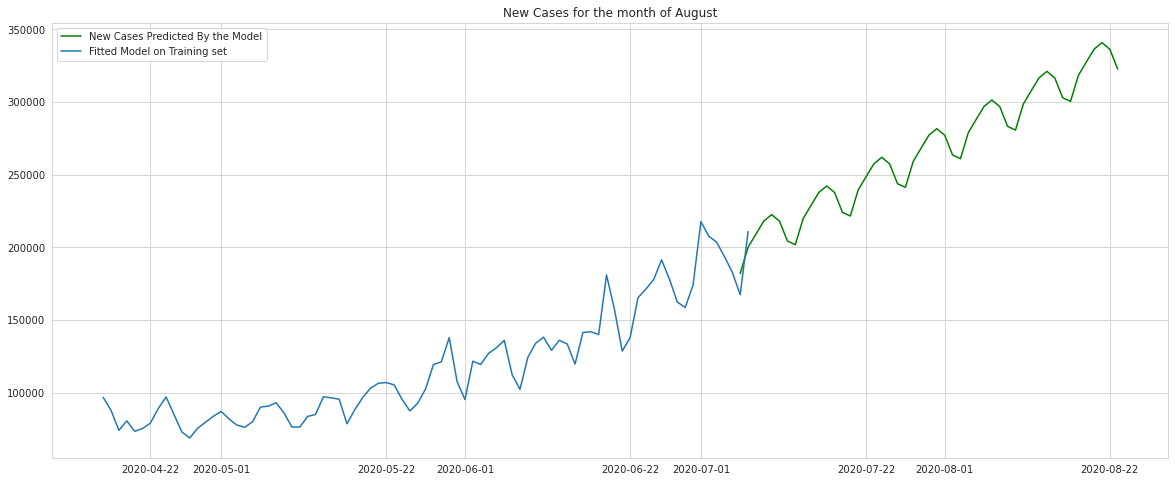

In [11]:
plt.figure(figsize=(20,8))


plt.plot(df_valids["Forecast Prediction"],color='Green')
plt.plot(df_train[["New cases"]])
plt.title("New Cases for the month of August")
plt.legend(['New Cases Predicted By the Model','Fitted Model on Training set'], loc='upper left')


**The cases seem to spike for the month of august.**

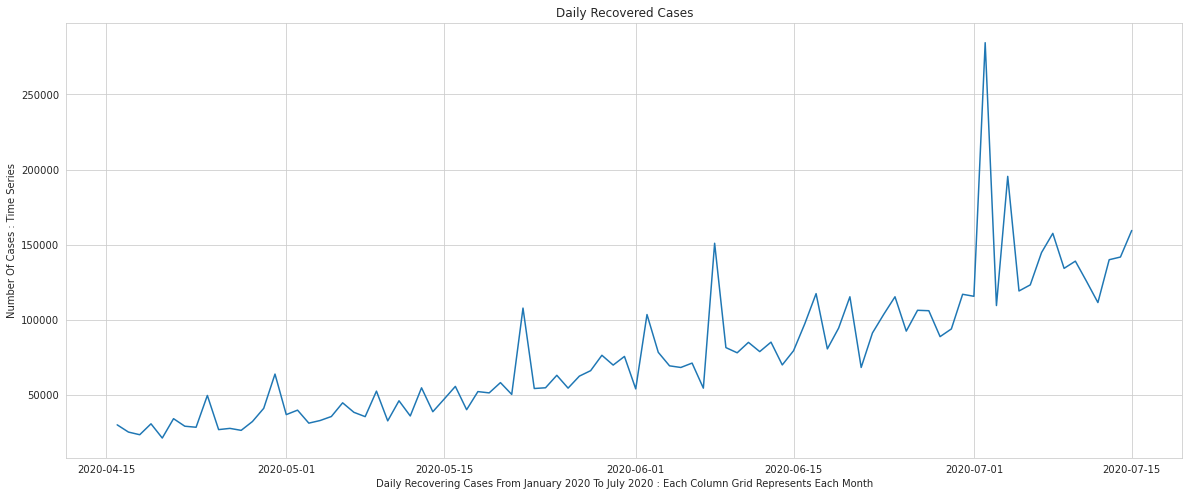

In [12]:
timeseries=pd.read_csv('../input/corona-virus-report/day_wise.csv')
timeseriesnew=timeseries[['Date','New recovered']].copy()

timeseriesnew['Date']=pd.to_datetime(timeseriesnew['Date']) 

timeseriesnew.head()
timeseriesnew['month'] = timeseriesnew['Date'].apply(lambda x: x.month)
timeseriesnew.set_index('Date', inplace= True)
timeseriesnew=timeseriesnew.fillna(method='ffill')

timeseriesyear=timeseriesnew.copy()
tsf=timeseriesnew.loc['2020-04-16':'2020-07-15'].copy()
tsf.drop('month', axis=1,inplace=True)
plt.figure(figsize=(20,8))
plt.plot(tsf)
plt.title('Daily Recovered Cases')
plt.xlabel('Daily Recovering Cases From January 2020 To July 2020 : Each Column Grid Represents Each Month')
plt.ylabel('Number Of Cases : Time Series')

plt.show()

In [13]:
tsf['Date'] = tsf.index
df_train = tsf[tsf['Date'] < "2020-07-07"]
df_valid = tsf[tsf['Date'] >= "2020-07-07"]
tsf.head()

,New recovered,Date
Date,,
2020-04-16,30090,2020-04-16
2020-04-17,25272,2020-04-17
2020-04-18,23502,2020-04-18
2020-04-19,30768,2020-04-19
2020-04-20,21305,2020-04-20


In [14]:
model_fbp=Prophet()
modelres=model_fbp.fit(df_train[["Date", "New recovered"]].rename(columns={"Date": "ds", "New recovered": "y"}))
forecast = model_fbp.predict(df_valid[["Date", "New recovered"]].rename(columns={"Date": "ds"}))
df_valid["Forecast Prediction"] = forecast.yhat.values

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


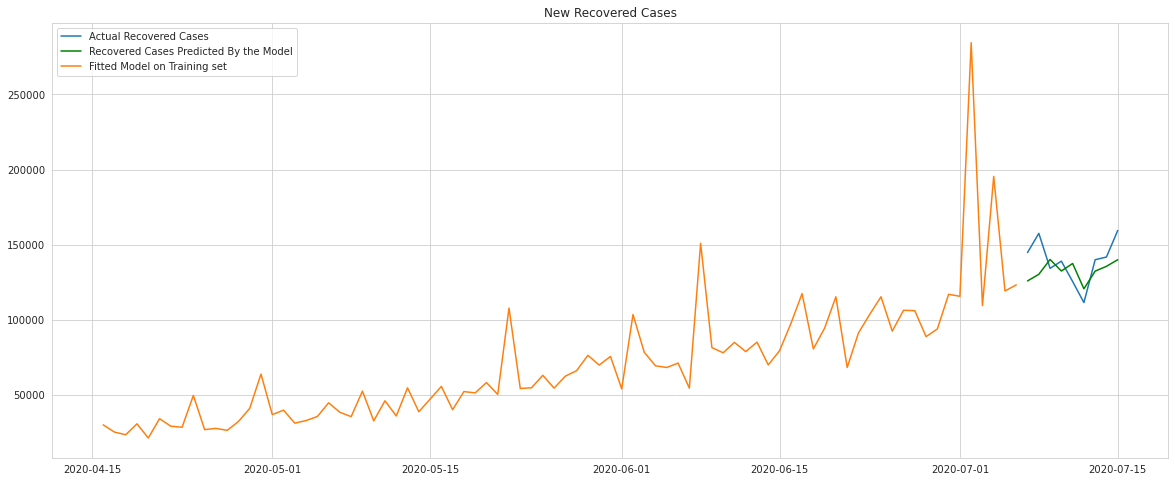

In [15]:
plt.figure(figsize=(20,8))

plt.plot(df_valid[["New recovered"]])
plt.plot(df_valid["Forecast Prediction"],color='Green')
plt.plot(df_train[["New recovered"]])
plt.title("New Recovered Cases")
plt.legend(['Actual Recovered Cases', 'Recovered Cases Predicted By the Model','Fitted Model on Training set'], loc='upper left')


# August Recovered Cases Prediction

In [16]:
from pandas.tseries.offsets import DateOffset
future_dates=[tsf.index[-1]+ DateOffset(days=x)for x in range(0,30)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=tsf.columns)
future_datest_df['Date'] = future_datest_df.index
future_datest_df.head(10)

,New recovered,Date
2020-07-16,NaN,2020-07-16
2020-07-17,NaN,2020-07-17
2020-07-18,NaN,2020-07-18
2020-07-19,NaN,2020-07-19
2020-07-20,NaN,2020-07-20
2020-07-21,NaN,2020-07-21
2020-07-22,NaN,2020-07-22
2020-07-23,NaN,2020-07-23
2020-07-24,NaN,2020-07-24
2020-07-25,NaN,2020-07-25


In [17]:
future_df=pd.concat([tsf,future_datest_df])

df_trains = future_df[future_df['Date'] < "2020-07-15"]
df_valids = future_df[future_df['Date'] >= "2020-07-06"]
future_df.tail()

,New recovered,Date
2020-08-09,NaN,2020-08-09
2020-08-10,NaN,2020-08-10
2020-08-11,NaN,2020-08-11
2020-08-12,NaN,2020-08-12
2020-08-13,NaN,2020-08-13


In [18]:
model_fbp=Prophet()
modelres=model_fbp.fit(df_trains[["Date", "New recovered"]].rename(columns={"Date": "ds", "New recovered": "y"}))
forecast = model_fbp.predict(df_valids[["Date", "New recovered"]].rename(columns={"Date": "ds"}))
df_valids["Forecast Prediction"] = forecast.yhat.values

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


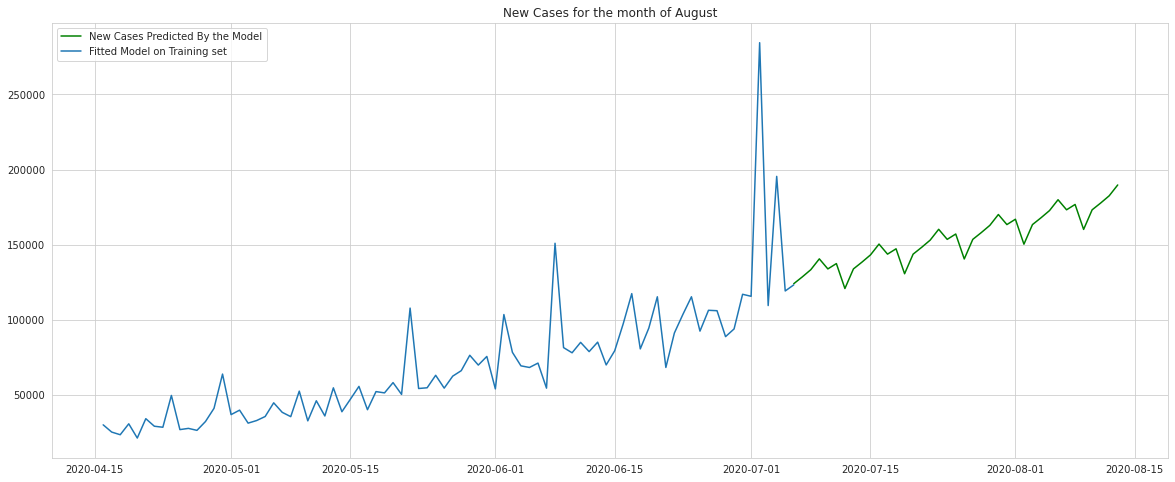

In [19]:
plt.figure(figsize=(20,8))


plt.plot(df_valids["Forecast Prediction"],color='Green')
plt.plot(df_train[["New recovered"]])
plt.title("New Cases for the month of August")
plt.legend(['New Cases Predicted By the Model','Fitted Model on Training set'], loc='upper left')


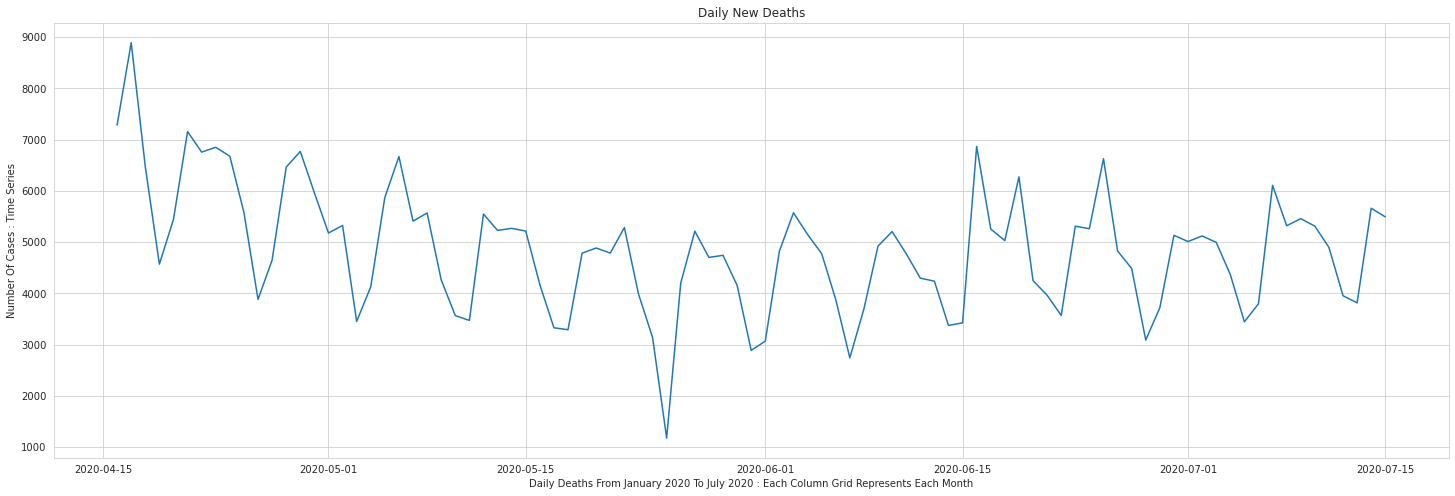

In [20]:
timeseries=pd.read_csv('../input/corona-virus-report/day_wise.csv')
timeseriesnew=timeseries[['Date','New deaths']].copy()
timeseriesnew['Date']=pd.to_datetime(timeseriesnew['Date']) 

timeseriesnew.head()
timeseriesnew['month'] = timeseriesnew['Date'].apply(lambda x: x.month)
timeseriesnew.set_index('Date', inplace= True)
timeseriesnew=timeseriesnew.fillna(method='ffill')

timeseriesyear=timeseriesnew.copy()
tsf=timeseriesnew.loc['2020-04-16':'2020-07-15'].copy()
tsf.drop('month', axis=1,inplace=True)
plt.figure(figsize=(25,8))
plt.plot(tsf)
plt.title('Daily New Deaths')
plt.xlabel('Daily Deaths From January 2020 To July 2020 : Each Column Grid Represents Each Month')
plt.ylabel('Number Of Cases : Time Series')
plt.show()

In [21]:
tsf['Date'] = tsf.index
df_train = tsf[tsf['Date'] < "2020-06-30"]
df_valid = tsf[tsf['Date'] >= "2020-06-30"]
tsf.head()

,New deaths,Date
Date,,
2020-04-16,7283,2020-04-16
2020-04-17,8890,2020-04-17
2020-04-18,6471,2020-04-18
2020-04-19,4570,2020-04-19
2020-04-20,5443,2020-04-20


In [22]:
model_fbp=Prophet()
modelres=model_fbp.fit(df_train[["Date",'New deaths']].rename(columns={"Date": "ds", "New deaths": "y"}))
forecast = model_fbp.predict(df_valid[["Date", "New deaths"]].rename(columns={"Date": "ds"}))
df_valid["Forecast Prediction"] = forecast.yhat.values

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


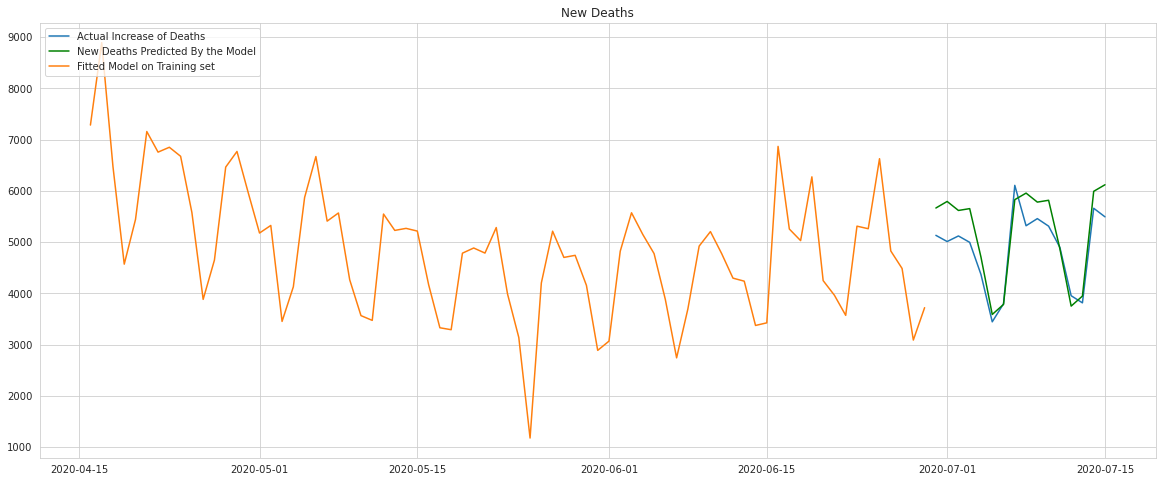

In [23]:
plt.figure(figsize=(20,8))

plt.plot(df_valid[["New deaths"]])
plt.plot(df_valid["Forecast Prediction"],color='Green')
plt.plot(df_train[["New deaths"]])
plt.title("New Deaths")
plt.legend(['Actual Increase of Deaths', 'New Deaths Predicted By the Model','Fitted Model on Training set'], loc='upper left')


# August Deaths Prediction

In [24]:
from pandas.tseries.offsets import DateOffset
future_dates=[tsf.index[-1]+ DateOffset(days=x)for x in range(0,30)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=tsf.columns)
future_datest_df['Date'] = future_datest_df.index
future_datest_df.head(10)

,New deaths,Date
2020-07-16,NaN,2020-07-16
2020-07-17,NaN,2020-07-17
2020-07-18,NaN,2020-07-18
2020-07-19,NaN,2020-07-19
2020-07-20,NaN,2020-07-20
2020-07-21,NaN,2020-07-21
2020-07-22,NaN,2020-07-22
2020-07-23,NaN,2020-07-23
2020-07-24,NaN,2020-07-24
2020-07-25,NaN,2020-07-25


In [25]:
future_df=pd.concat([tsf,future_datest_df])

df_trains = future_df[future_df['Date'] < "2020-06-27"]
df_valids = future_df[future_df['Date'] >= "2020-06-27"]
future_df.tail()

,New deaths,Date
2020-08-09,NaN,2020-08-09
2020-08-10,NaN,2020-08-10
2020-08-11,NaN,2020-08-11
2020-08-12,NaN,2020-08-12
2020-08-13,NaN,2020-08-13


In [26]:
model_fbp=Prophet()
modelres=model_fbp.fit(df_trains[["Date", "New deaths"]].rename(columns={"Date": "ds", "New deaths": "y"}))
forecast = model_fbp.predict(df_valids[["Date", "New deaths"]].rename(columns={"Date": "ds"}))
df_valids["Forecast Prediction"] = forecast.yhat.values

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


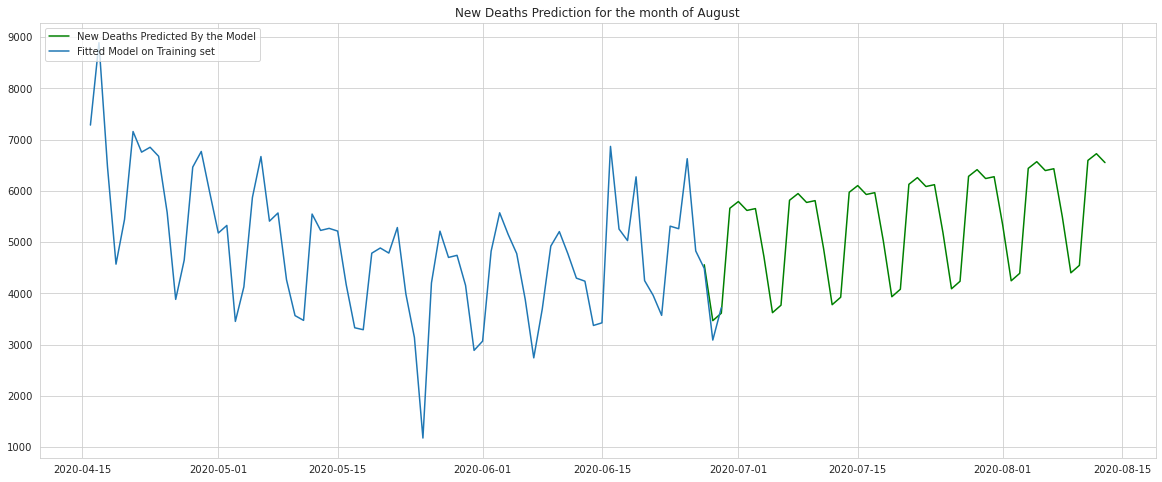

In [27]:
plt.figure(figsize=(20,8))


plt.plot(df_valids["Forecast Prediction"],color='Green')
plt.plot(df_train[["New deaths"]])
plt.title("New Deaths Prediction for the month of August")
plt.legend(['New Deaths Predicted By the Model','Fitted Model on Training set'], loc='upper left')


**Deaths also seem to increase**

**Your feedback is much appreciated**